In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import db_builder.db_handler as dbh
import logging
from getpass import getpass
from datetime import datetime
from fpdf import FPDF
import usage_time as utp
import seaborn as sns

In [2]:
plotter = utp.UsageTimePlotter()

Connected to PostgreSQL, DB: ttdatabase


In [3]:
db_params = {
    'user': 'postgres',
    'password': getpass('Please enter DB pw'),  # enter your DB password
    'host': 'localhost',  # 'localhost' or IP address
    'port': '5432',  # '5432'
    'database': 'ttdatabase', #tensionTerminator
}

In [4]:
toolcheck = dbh.DB_Conn(db_params)
toolcheck.connect()
engine  = toolcheck.get_engine()

Connected to PostgreSQL, DB: ttdatabase


In [5]:
def table_to_df(tabel_name: str):
    return pd.read_sql_table(tabel_name, con=engine)

In [6]:
loop_df = table_to_df('loop').reset_index().set_index('id')

2023-12-01 08:48:06,264 INFO sqlalchemy.engine.Engine select pg_catalog.version()
2023-12-01 08:48:06,264 INFO sqlalchemy.engine.Engine [raw sql] {}
2023-12-01 08:48:06,264 INFO sqlalchemy.engine.Engine select current_schema()
2023-12-01 08:48:06,275 INFO sqlalchemy.engine.Engine [raw sql] {}
2023-12-01 08:48:06,275 INFO sqlalchemy.engine.Engine show standard_conforming_strings
2023-12-01 08:48:06,275 INFO sqlalchemy.engine.Engine [raw sql] {}
2023-12-01 08:48:06,275 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2023-12-01 08:48:06,279 INFO sqlalchemy.engine.Engine SELECT pg_catalog.pg_class.relname 
FROM pg_catalog.pg_class JOIN pg_catalog.pg_namespace ON pg_catalog.pg_namespace.oid = pg_catalog.pg_class.relnamespace 
WHERE pg_catalog.pg_class.relname = %(table_name)s AND pg_catalog.pg_class.relkind = ANY (ARRAY[%(param_1)s, %(param_2)s, %(param_3)s, %(param_4)s, %(param_5)s]) AND pg_catalog.pg_table_is_visible(pg_catalog.pg_class.oid) AND pg_catalog.pg_namespace.nspname != %(nspname

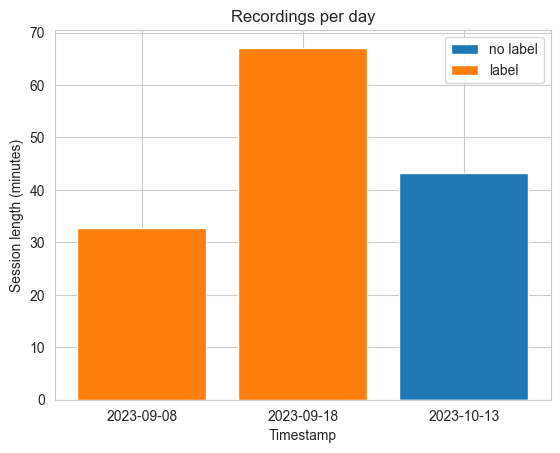

In [7]:
title = 'Recordings per day'

grouped_df = loop_df.groupby(loop_df['timestamp'].dt.date)['session_length'].sum().reset_index()
grouped_df['labeled'] = \
loop_df[loop_df['human_labeled'] == True].groupby(loop_df['timestamp'].dt.date)['session_length'].sum().reset_index()[
    'session_length']

grouped_df = grouped_df.fillna(0)
grouped_df
loop_df.loc[loop_df['human_labeled'] == True, 'session_length'].sum()
grouped_df['session_length'] / 60

label = ['label', 'no lable']

plt.bar(grouped_df['timestamp'].astype(str), grouped_df['session_length'] /60, label='no label')
plt.bar(grouped_df['timestamp'].astype(str), grouped_df['labeled'] / 60, label='label')
plt.xlabel('Timestamp')
plt.ylabel('Session length (minutes)')
plt.title(title)
plt.legend()

plt.savefig(f"diagrams/{title}.png")

In [8]:
def get_user(id):
    user_df = table_to_df('users')
    users_loc = user_df.loc[user_df['id'] == id].values
    return f"{users_loc[0][1]} {users_loc[0][2]}"

In [9]:
session_user_id_df_test = loop_df.groupby(loop_df['timestamp'].dt.date)['user_id'].unique()
session_user_id_df_test1 = loop_df.groupby([loop_df['timestamp'].dt.date, 'user_id']).size().unstack(fill_value=0)
session_user_time_df = loop_df.groupby([loop_df['timestamp'].dt.date, 'user_id'])['session_length'].sum().unstack(
    fill_value=0)
session_user_time_df = session_user_time_df.reset_index()
users_df = table_to_df('users')

2023-12-01 08:48:06,624 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2023-12-01 08:48:06,624 INFO sqlalchemy.engine.Engine SELECT pg_catalog.pg_class.relname 
FROM pg_catalog.pg_class JOIN pg_catalog.pg_namespace ON pg_catalog.pg_namespace.oid = pg_catalog.pg_class.relnamespace 
WHERE pg_catalog.pg_class.relname = %(table_name)s AND pg_catalog.pg_class.relkind = ANY (ARRAY[%(param_1)s, %(param_2)s, %(param_3)s, %(param_4)s, %(param_5)s]) AND pg_catalog.pg_table_is_visible(pg_catalog.pg_class.oid) AND pg_catalog.pg_namespace.nspname != %(nspname_1)s
2023-12-01 08:48:06,624 INFO sqlalchemy.engine.Engine [cached since 0.348s ago] {'table_name': 'users', 'param_1': 'r', 'param_2': 'p', 'param_3': 'f', 'param_4': 'v', 'param_5': 'm', 'nspname_1': 'pg_catalog'}
2023-12-01 08:48:06,624 INFO sqlalchemy.engine.Engine SELECT pg_catalog.pg_class.relname 
FROM pg_catalog.pg_class JOIN pg_catalog.pg_namespace ON pg_catalog.pg_namespace.oid = pg_catalog.pg_class.relnamespace 
WHERE pg_catalog.pg_c

In [10]:
users_df

,id,name,surename
0,1,unknown,unknown
1,2,Christina,Greiderer
2,3,Christine,Lackinger
3,4,Juergen,Zangerl
4,5,Lukas,Prenner
5,6,Martin,Hofer
6,7,Pirmin,Aster
7,8,Robert,Goller
8,9,Suganthi,Manoharan
9,10,Philipp,Egger


In [11]:
session_user_time_df[10 + 1]

0    30
1     0
2     0
Name: 11, dtype: int64

2023-12-01 08:48:06,680 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2023-12-01 08:48:06,681 INFO sqlalchemy.engine.Engine SELECT pg_catalog.pg_class.relname 
FROM pg_catalog.pg_class JOIN pg_catalog.pg_namespace ON pg_catalog.pg_namespace.oid = pg_catalog.pg_class.relnamespace 
WHERE pg_catalog.pg_class.relname = %(table_name)s AND pg_catalog.pg_class.relkind = ANY (ARRAY[%(param_1)s, %(param_2)s, %(param_3)s, %(param_4)s, %(param_5)s]) AND pg_catalog.pg_table_is_visible(pg_catalog.pg_class.oid) AND pg_catalog.pg_namespace.nspname != %(nspname_1)s
2023-12-01 08:48:06,681 INFO sqlalchemy.engine.Engine [cached since 0.4022s ago] {'table_name': 'users', 'param_1': 'r', 'param_2': 'p', 'param_3': 'f', 'param_4': 'v', 'param_5': 'm', 'nspname_1': 'pg_catalog'}
2023-12-01 08:48:06,681 INFO sqlalchemy.engine.Engine SELECT pg_catalog.pg_class.relname 
FROM pg_catalog.pg_class JOIN pg_catalog.pg_namespace ON pg_catalog.pg_namespace.oid = pg_catalog.pg_class.relnamespace 
WHERE pg_catalog.pg_

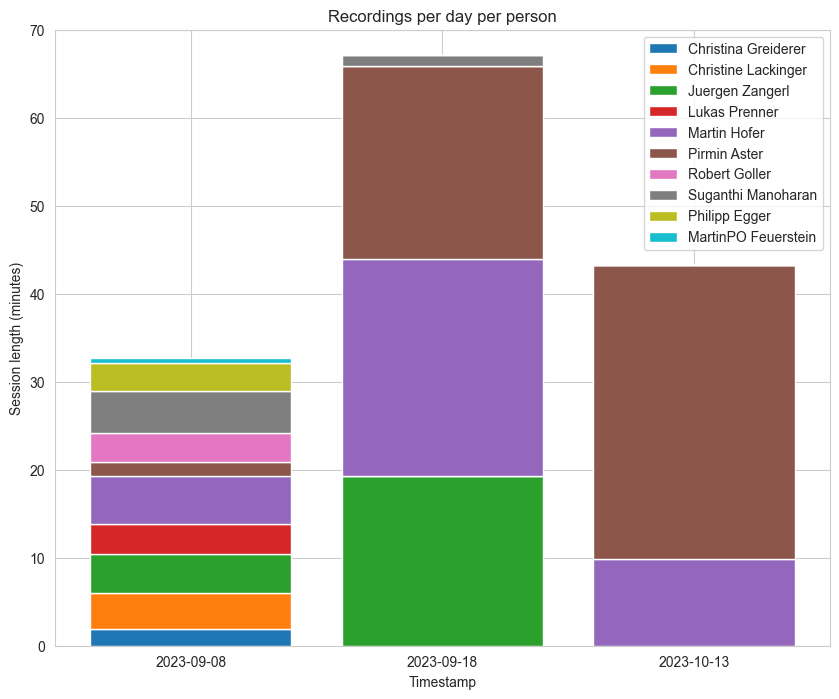

In [12]:
title = 'Recordings per day per person'

bottom = np.zeros(3)
plt.figure(figsize=(10,8))
for x in range(loop_df['user_id'].nunique()):
    plt.bar(session_user_time_df['timestamp'].astype(str), session_user_time_df[x + 2] / 60, label=f"{get_user(x + 2)}",
            bottom=bottom)
    bottom += session_user_time_df[x + 2] / 60
#plt.bar(grouped_df['timestamp'].astype(str), grouped_df['labeled']/60, label='label')
plt.xlabel('Timestamp')
plt.ylabel('Session length (minutes)')
plt.ylim(0, 70)
plt.title(title)
plt.legend()

plt.savefig(f"diagrams/{title}.png")

2023-12-01 08:48:07,274 INFO sqlalchemy.engine.Engine select pg_catalog.version()
2023-12-01 08:48:07,274 INFO sqlalchemy.engine.Engine [raw sql] {}
2023-12-01 08:48:07,274 INFO sqlalchemy.engine.Engine select current_schema()
2023-12-01 08:48:07,274 INFO sqlalchemy.engine.Engine [raw sql] {}
2023-12-01 08:48:07,279 INFO sqlalchemy.engine.Engine show standard_conforming_strings
2023-12-01 08:48:07,279 INFO sqlalchemy.engine.Engine [raw sql] {}
2023-12-01 08:48:07,281 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2023-12-01 08:48:07,281 INFO sqlalchemy.engine.Engine SELECT pg_catalog.pg_class.relname 
FROM pg_catalog.pg_class JOIN pg_catalog.pg_namespace ON pg_catalog.pg_namespace.oid = pg_catalog.pg_class.relnamespace 
WHERE pg_catalog.pg_class.relname = %(table_name)s AND pg_catalog.pg_class.relkind = ANY (ARRAY[%(param_1)s, %(param_2)s, %(param_3)s, %(param_4)s, %(param_5)s]) AND pg_catalog.pg_table_is_visible(pg_catalog.pg_class.oid) AND pg_catalog.pg_namespace.nspname != %(nspname

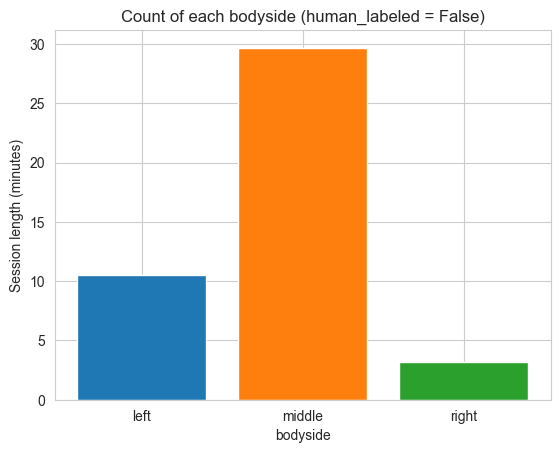

In [13]:
plotter.plot('bodyside')

2023-12-01 08:48:07,506 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2023-12-01 08:48:07,509 INFO sqlalchemy.engine.Engine SELECT pg_catalog.pg_class.relname 
FROM pg_catalog.pg_class JOIN pg_catalog.pg_namespace ON pg_catalog.pg_namespace.oid = pg_catalog.pg_class.relnamespace 
WHERE pg_catalog.pg_class.relname = %(table_name)s AND pg_catalog.pg_class.relkind = ANY (ARRAY[%(param_1)s, %(param_2)s, %(param_3)s, %(param_4)s, %(param_5)s]) AND pg_catalog.pg_table_is_visible(pg_catalog.pg_class.oid) AND pg_catalog.pg_namespace.nspname != %(nspname_1)s
2023-12-01 08:48:07,509 INFO sqlalchemy.engine.Engine [cached since 0.2269s ago] {'table_name': 'tools', 'param_1': 'r', 'param_2': 'p', 'param_3': 'f', 'param_4': 'v', 'param_5': 'm', 'nspname_1': 'pg_catalog'}
2023-12-01 08:48:07,509 INFO sqlalchemy.engine.Engine SELECT pg_catalog.pg_class.relname 
FROM pg_catalog.pg_class JOIN pg_catalog.pg_namespace ON pg_catalog.pg_namespace.oid = pg_catalog.pg_class.relnamespace 
WHERE pg_catalog.pg_

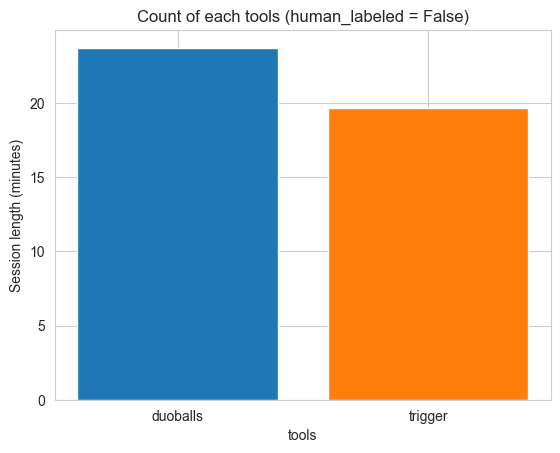

In [14]:
plotter.plot('tools')

In [15]:
toolcheck.get_data()

2023-12-01 08:48:07,671 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2023-12-01 08:48:07,675 INFO sqlalchemy.engine.Engine 
            SELECT l.id AS loop_id, l.timestamp, l.session_length, l.location, l.human_labeled, v.file_path, u.name, u.surename, 
            b.bodyside_id, t.tool_id, tt.tool, tt.time_in_use AS tool_time_in_use, bs.side AS bodyside, bs.time_in_use AS bodyside_time_in_use
            FROM loop l
            LEFT JOIN video v ON l.id = v.loop_id AND v.device = 'rgbCam'
            LEFT JOIN users u ON l.user_id = u.id
            LEFT JOIN bodyside_loop_association b ON l.id = b.loop_id
            LEFT JOIN tools_loop_association t ON l.id = t.loop_id
            LEFT JOIN tools tt ON t.tool_id = tt.id
            LEFT JOIN bodyside bs ON b.bodyside_id = bs.id
        
2023-12-01 08:48:07,675 INFO sqlalchemy.engine.Engine [generated in 0.00070s] {}


,loop_id,timestamp,session_length,location,human_labeled,file_path,name,surename,bodyside_id,tool_id,tool,tool_time_in_use,bodyside,bodyside_time_in_use
0,1,2023-09-08 19:12:12.778376,116,MCI,True,D:/BigBlock_01/tt_video_data/videos-2023-09-08...,Martin,Hofer,2,2,trigger,None,left,None
1,2,2023-09-08 19:15:23.051845,132,MCI,True,D:/BigBlock_01/tt_video_data/videos-2023-09-08...,Juergen,Zangerl,2,2,trigger,None,left,None
2,3,2023-09-08 19:20:38.981489,54,MCI,True,D:/BigBlock_01/tt_video_data/videos-2023-09-08...,Christina,Greiderer,2,2,trigger,None,left,None
3,4,2023-09-08 19:21:18.026639,98,MCI,True,D:/BigBlock_01/tt_video_data/videos-2023-09-08...,Philipp,Egger,2,2,trigger,None,left,None
4,5,2023-09-08 19:23:23.087926,101,MCI,True,D:/BigBlock_01/tt_video_data/videos-2023-09-08...,Lukas,Prenner,2,2,trigger,None,left,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
387,150,2023-10-13 14:27:46.668796,122,MCI,False,D:/BigBlock_01/tt_video_data/videos-2023-10-13...,Pirmin,Aster,69,47,duoballs,00:02:02,middle,00:01:56
388,150,2023-10-13 14:27:46.668796,122,MCI,False,D:/BigBlock_01/tt_video_data/videos-2023-10-13...,Pirmin,Aster,69,48,trigger,00:00:00,middle,00:01:56
389,150,2023-10-13 14:27:46.668796,122,MCI,False,D:/BigBlock_01/tt_video_data/videos-2023-10-13...,Pirmin,Aster,70,1,unknown,None,right,00:00:00
390,150,2023-10-13 14:27:46.668796,122,MCI,False,D:/BigBlock_01/tt_video_data/videos-2023-10-13...,Pirmin,Aster,70,47,duoballs,00:02:02,right,00:00:00


In [16]:
data = toolcheck.get_data()

2023-12-01 08:48:07,694 INFO sqlalchemy.engine.Engine 
            SELECT l.id AS loop_id, l.timestamp, l.session_length, l.location, l.human_labeled, v.file_path, u.name, u.surename, 
            b.bodyside_id, t.tool_id, tt.tool, tt.time_in_use AS tool_time_in_use, bs.side AS bodyside, bs.time_in_use AS bodyside_time_in_use
            FROM loop l
            LEFT JOIN video v ON l.id = v.loop_id AND v.device = 'rgbCam'
            LEFT JOIN users u ON l.user_id = u.id
            LEFT JOIN bodyside_loop_association b ON l.id = b.loop_id
            LEFT JOIN tools_loop_association t ON l.id = t.loop_id
            LEFT JOIN tools tt ON t.tool_id = tt.id
            LEFT JOIN bodyside bs ON b.bodyside_id = bs.id
        
2023-12-01 08:48:07,694 INFO sqlalchemy.engine.Engine [cached since 0.02236s ago] {}


In [17]:
toolcheck.get_data().columns

2023-12-01 08:48:07,706 INFO sqlalchemy.engine.Engine 
            SELECT l.id AS loop_id, l.timestamp, l.session_length, l.location, l.human_labeled, v.file_path, u.name, u.surename, 
            b.bodyside_id, t.tool_id, tt.tool, tt.time_in_use AS tool_time_in_use, bs.side AS bodyside, bs.time_in_use AS bodyside_time_in_use
            FROM loop l
            LEFT JOIN video v ON l.id = v.loop_id AND v.device = 'rgbCam'
            LEFT JOIN users u ON l.user_id = u.id
            LEFT JOIN bodyside_loop_association b ON l.id = b.loop_id
            LEFT JOIN tools_loop_association t ON l.id = t.loop_id
            LEFT JOIN tools tt ON t.tool_id = tt.id
            LEFT JOIN bodyside bs ON b.bodyside_id = bs.id
        
2023-12-01 08:48:07,706 INFO sqlalchemy.engine.Engine [cached since 0.03239s ago] {}


Index(['loop_id', 'timestamp', 'session_length', 'location', 'human_labeled',
       'file_path', 'name', 'surename', 'bodyside_id', 'tool_id', 'tool',
       'tool_time_in_use', 'bodyside', 'bodyside_time_in_use'],
      dtype='object')

C:\Users\Pirmin.000\AppData\Local\Temp\ipykernel_17544\2843632617.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='location', y='session_length', hue='human_labeled', data=data, ci=None)


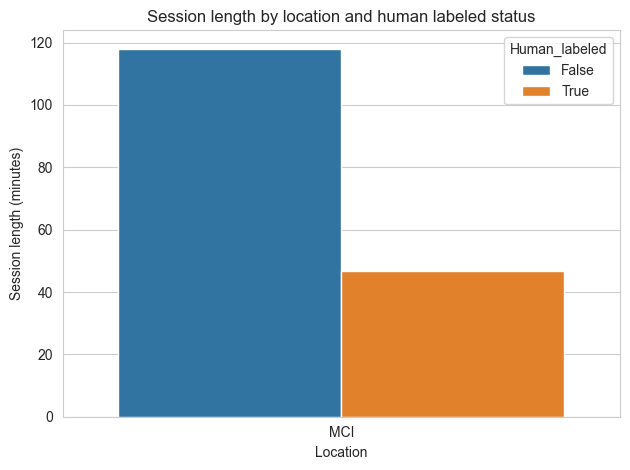

In [18]:
title = 'Session length by location and human labeled status'

sns.barplot(x='location', y='session_length', hue='human_labeled', data=data, ci=None)
plt.xlabel('Location')
plt.ylabel('Session length (minutes)')
plt.title(title)
plt.legend(title='Human_labeled', loc='upper right')
plt.tight_layout()
plt.savefig(f"diagrams/{title}.png")

In [19]:
toolcheck.get_combined_labeled_data()

2023-12-01 08:48:07,907 INFO sqlalchemy.engine.Engine 
            SELECT l.id AS loop_id, v.file_path, u.name, u.surename
            FROM loop l
            LEFT JOIN video v ON l.id = v.loop_id AND v.device = 'rgbCam'
            LEFT JOIN users u ON l.user_id = u.id
            LEFT JOIN bodyside_loop_association b ON l.id = b.loop_id
            WHERE l.human_labeled = true
        
2023-12-01 08:48:07,907 INFO sqlalchemy.engine.Engine [generated in 0.00089s] {}


,loop_id,file_path,name,surename
0,1,D:/BigBlock_01/tt_video_data/videos-2023-09-08...,Martin,Hofer
1,2,D:/BigBlock_01/tt_video_data/videos-2023-09-08...,Juergen,Zangerl
2,3,D:/BigBlock_01/tt_video_data/videos-2023-09-08...,Christina,Greiderer
3,4,D:/BigBlock_01/tt_video_data/videos-2023-09-08...,Philipp,Egger
4,5,D:/BigBlock_01/tt_video_data/videos-2023-09-08...,Lukas,Prenner
...,...,...,...,...
123,124,D:/BigBlock_01/tt_video_data/videos-2023-09-18...,Juergen,Zangerl
124,125,D:/BigBlock_01/tt_video_data/videos-2023-09-18...,Juergen,Zangerl
125,126,D:/BigBlock_01/tt_video_data/videos-2023-09-18...,Juergen,Zangerl
126,127,D:/BigBlock_01/tt_video_data/videos-2023-09-18...,Juergen,Zangerl


In [20]:
def overview():
    result = (
        f"Die DB enthält {loop_df['timestamp'].count()} Aufzeichnungen, das entspricht {(loop_df['session_length'].sum()/60):.2f} Minuten an Videomaterial:\n"
        f"\t\t{loop_df['human_labeled'].sum()} Aufzeichnungen sind von Menschen gelabelt ({(loop_df.loc[loop_df['human_labeled'] == True, 'session_length'].sum()/60):.2f} Minuten)\n"
        f"\t\t{(loop_df['human_labeled'] == False).sum()} Aufzeichnungen sind ungelabelt ({(loop_df.loc[loop_df['human_labeled'] == False, 'session_length'].sum()/60):.2f} Minuten)\n"
        f"Videolänge mean: {loop_df['session_length'].mean()} Sekunden\n"
        f"Videolänge median: {loop_df['session_length'].median()} Sekunden\n"
        f"Videolänge min: {loop_df['session_length'].min()} Sekunden\n"
        f"Videolänge max: {loop_df['session_length'].max()} Sekunden\n"
    )
    return result


In [21]:
def output_df_to_pdf(pdf, df):
    
    table_cell_widths = {}
    for col in df.columns:
        max_length = max(df[col].astype(str).apply(len).max(), len(col))
        table_cell_widths[col] = max_length * 2.5

    pdf.set_font('Courier', '', 10)
    
    for col in df.columns:
        pdf.cell(table_cell_widths[col], 6, col, align='C', border=1)
    pdf.ln(6)
    
    for _, row in df.iterrows():
        for col in df.columns:
            value = str(row[col])
            pdf.cell(table_cell_widths[col], 6, value, align='C', border=1)
        pdf.ln(6)


In [22]:
def get_time():
    return datetime.now().strftime("%d_%m_%Y_%H_%M_%S")

In [23]:
#loop_df.to_json('your_file.json', orient='records')


In [25]:
pdf = FPDF()
pdf.add_page()
pdf.set_font('Courier', 'B', 16)

pdf.image('diagrams/TES-POS_Web.png')
pdf.set_text_color(255,155,0)
pdf.cell(60, 10, txt=f"TensionTerminator Datareport {get_time()}")
pdf.ln(10)
pdf.set_font('Courier', '', 10)
pdf.set_text_color(0,0,0)
pdf.multi_cell(0,6, txt=overview())

pdf.image('diagrams/Recordings per day.png',10,100,200)
pdf.add_page()
pdf.image('diagrams/Session length per day.png',10,10,180)
pdf.image('diagrams/Session length by location with human labeled.png',10,150,180)
pdf.add_page()
pdf.image('diagrams/Violinplot of session Length by human labeled.png',15,10,180)
pdf.image('diagrams/Session length by location and human labeled status.png',10,150,180)
pdf.add_page()
pdf.image('diagrams/Count of each bodyside _hl_f.png',10,10,180)
pdf.image('diagrams/Count of each tools _hl_f.png',10,150,180)
pdf.add_page()
pdf.image('diagrams/Distribution of Session Length.png',10,10,180)
pdf.image('diagrams/Count of each tools _hl_f.png',10,150,180)
pdf.add_page()
pdf.image('diagrams/Tool Usage Time by Bodyside.png',10,10,180)
pdf.image('diagrams/Tool Usage Time by Bodyside _hl_t.png',10,150,180)
pdf.add_page()
pdf.image('diagrams/Tool Usage Time by Bodyside _hl_f.png',10,10,180)
pdf.image('diagrams/Tool time distribution by bodyside.png',10,150,180)
pdf.add_page()
pdf.image('diagrams/Bodyside time by tool used.png',10,10,180)
pdf.image('diagrams/Linear regression plot (human_labeled = False).png',10,150,180)
pdf.add_page()
pdf.image('diagrams/Distribution of tools in use _hl_f.png',10,10,180)
pdf.image('diagrams/Distribution of tool usage _hl_f.png',10,150,180)
pdf.add_page()
pdf.image('diagrams/Distribution of bodyside in use hist _hl_f.png',10,10,180)
pdf.image('diagrams/Distribution of bodyside in use _hl_f.png',10,150,180)
pdf.add_page()
pdf.image('diagrams/Session length vs bodyside in use.png',10,10,180)
pdf.image('diagrams/Session length vs tool time.png',10,150,180)
pdf.add_page()
pdf.image('diagrams/Correlation Heatmap.png',10,0,200)



#loop_df_noid = loop_df
### Transform the Date column as str dtype
#output_df_to_pdf(pdf, loop_df_noid.tail(3))

#output_df_to_pdf(pdf, loop_df_noid)
# 3. Output the PDF file
pdf.output(f'pdf_reports/tt_data_report_{get_time()}.pdf', 'F')
#pdf.output(f'pdf_reports/tt_data_report.pdf', 'F')

''